In [ ]:
import warnings, os
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
# Import preprocess_input from the specific model module, for example VGG16:
from tensorflow.keras.applications.vgg16 import preprocess_input
# If you intend to use ResNet50 for preprocessing:
#from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files
from IPython.display import display, Image

In [ ]:
# Load VGG16 (weights='imagenet' means use weights pre-trained on ImageNet)
vgg16_model = VGG16(weights='imagenet')

# Load ResNet50
resnet50_model = ResNet50(weights='imagenet')

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step
102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Saving taj-mahal.jpg to taj-mahal (1).jpg
Uploaded "taj-mahal (1).jpg"


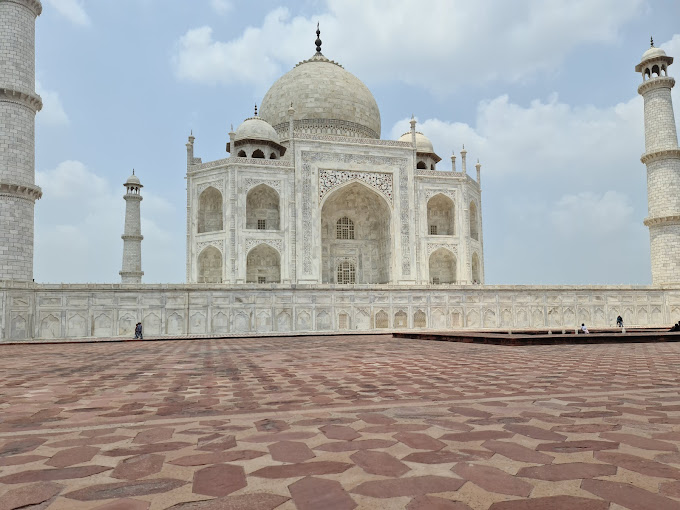

In [ ]:
uploaded = files.upload()

for filename in uploaded.keys():
  print(f'Uploaded "{filename}"')
  img_path = filename

display(Image(img_path))

In [ ]:
img = image.load_img(img_path, target_size=(224, 224)) #VGG16 and ResNet50 expect 224x224 images
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # Convert to batch format (1, 224, 224, 3)
img_array = preprocess_input(img_array) # Preprocess for the specific model

In [ ]:
predictions_vgg16 = vgg16_model.predict(img_array)
decoded_predictions_vgg16 = tf.keras.applications.vgg16.decode_predictions(predictions_vgg16, top=3)[0] # Get top 3 predictions

print("VGG16 Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions_vgg16):
  print(f"{i + 1}: {label} ({score:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step
VGG16 Predictions:
1: mosque (0.82)
2: monastery (0.08)
3: dome (0.05)


In [ ]:
predictions_resnet50 = resnet50_model.predict(img_array)
decoded_predictions_resnet50 = tf.keras.applications.resnet50.decode_predictions(predictions_resnet50, top=3)[0]

print("\nResNet50 Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions_resnet50):
  print(f"{i + 1}: {label} ({score:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step

ResNet50 Predictions:
1: monastery (0.58)
2: mosque (0.31)
3: palace (0.04)
